In [2]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt 
import numpy as np
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("./final_data/final_data.csv")
data.head(5)

,daily_processing_count,enter_COD,enter_PH,enter_NH3N,enter_TN,enter_TP,MLSS,DO,out_COD,out_PH,out_NH3N,out_TN,out_TP,other
0,1186.0,53.66,7.52,40.85,13.26,2.31,1756.0,5.19,10.38,7.14,0.040,5.41,0.34,NaN
1,2615.0,56.24,7.45,18.44,17.65,2.91,1800.0,5.23,18.03,6.96,0.054,8.14,0.26,NaN
2,2365.0,44.30,7.62,9.36,20.30,2.49,1622.0,4.36,19.97,7.14,0.120,10.61,0.32,NaN
3,1082.0,33.36,7.66,17.62,19.55,2.26,1820.0,4.70,5.36,7.00,0.040,9.97,0.23,NaN
4,2473.0,40.16,7.45,29.29,21.64,3.01,2063.0,5.11,17.12,7.14,0.040,10.76,0.38,NaN


In [4]:
data.columns

Index(['daily_processing_count', 'enter_COD', 'enter_PH', 'enter_NH3N',
       'enter_TN', 'enter_TP', 'MLSS', 'DO', 'out_COD', 'out_PH', 'out_NH3N',
       'out_TN', 'out_TP', 'other'],
      dtype='object')

In [5]:
x = data[['daily_processing_count', 'enter_COD', 'enter_PH', 'enter_NH3N',
       'enter_TN', 'enter_TP', 'MLSS', 'DO']].values
y = data[['out_COD']].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
import sklearn
!pip install xgboost
model = xgb.XGBRegressor(max_depth = 5, objective='reg:gamma')

  Using cached xgboost-1.6.1-py3-none-win_amd64.whl (125.4 MB)


In [8]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, objective='reg:gamma', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [10]:
ans = model.predict(x_test)
ans

array([ 5.917603 ,  5.1578674,  5.4340544,  5.4761705,  7.0268407,
       19.264755 , 21.067753 ,  3.7339146, 32.515545 ,  9.757731 ,
        9.718775 ,  9.639502 ,  5.8367705, 33.15552  , 18.762894 ,
        9.781024 , 16.679193 ,  2.624099 ,  5.38074  ,  3.5410671,
       12.099857 ,  2.4066217,  4.0236936,  6.567361 ,  5.7447567,
        4.765875 , 26.587992 ,  9.04591  ,  4.6854215,  3.4559784,
        6.4253917, 14.9242935,  4.785417 , 11.355027 , 11.154022 ,
        6.5599737,  2.9951303, 12.389977 ,  9.900992 ,  9.913879 ,
        6.8617277, 33.043392 ,  3.9430223, 29.28923  ,  6.8648553,
        6.2551756,  7.981117 ,  4.843913 ,  4.108954 , 10.054936 ,
       25.372145 ,  2.9502003,  6.234456 , 23.14826  ,  4.77314  ,
       11.400206 , 28.452692 ,  7.7318225, 10.755633 ,  5.2607913,
       13.898188 , 29.434252 , 14.608248 ,  4.461181 ,  5.5050473,
       14.2405205,  5.496492 ,  2.2845423,  3.7878585,  6.58198  ,
        9.053553 ,  4.4046865, 12.733012 ,  4.5948234,  4.2911

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
mean_squared_error(ans, y_test)

51.27908667308813

In [19]:
print("rmse=", np.sqrt(mean_squared_error(ans, y_test)))

rmse= 7.160941744846702


In [18]:
print("r2_score=", r2_score(y_test, ans))

r2_score= 0.5682539252632809


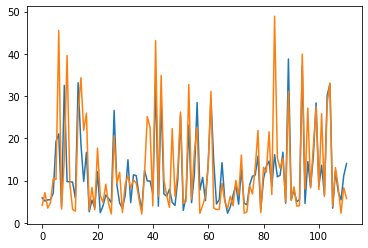

In [17]:
plt.plot(ans)
plt.plot(y_test)